# Week 13: Solution to Dijkstra's algorithm

<font color='blue'><b>Goals of this notebook:</b></font> Implement Dijkstra's algorithm to find the shortest paths for weighted directed graphs and measure its running time.

Below, you can see a subset of the Swiss-German railway network: each vertex corresponds to a city, while each arc corresponds to a train line between the two cities. The arc weight represents the travel time in minutes (taken from `www.sbb.ch` of the shortest direct connection).

For simplicity, we only look at travel time between cities and ignore the time needed for transfers.

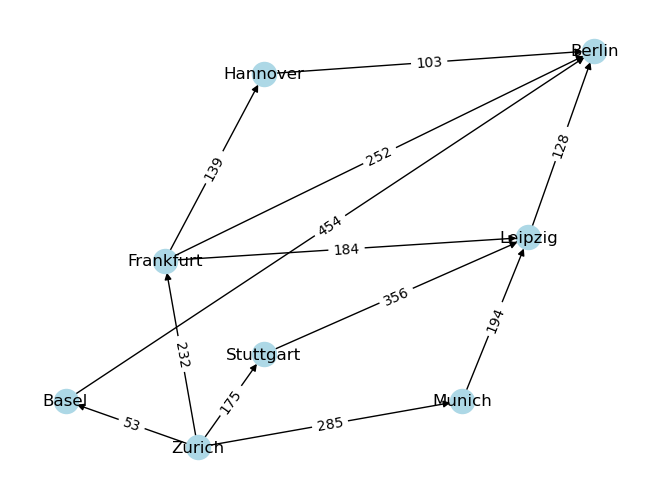

In [1]:
import networkx as nx

# create graph G
G = nx.DiGraph()
node_pos = {'Zurich': (2,0), 'Basel': (-2,2), 'Munich': (10,2), 
            'Stuttgart': (4,4), 'Frankfurt': (1,8), 
            'Hannover': (4,16), 'Leipzig': (12,9), 'Berlin': (14,17)}
G.add_nodes_from(node_pos.keys())
G.add_edges_from([('Zurich','Basel',{'weight': 53}),
                  ('Zurich','Frankfurt',{'weight': 60*3+52}),
                  ('Zurich','Munich',{'weight': 60*4+45}),
                  ('Zurich','Stuttgart',{'weight': 60*2+55}),
                  ('Hannover','Berlin',{'weight': 60*1+43}),
                  ('Frankfurt','Leipzig',{'weight': 60*3+4}),
                  ('Frankfurt','Hannover',{'weight': 60*2+19}),
                  ('Frankfurt','Berlin',{'weight': 60*4+12}),
                  ('Munich','Leipzig',{'weight': 60*3+14}),
                  ('Stuttgart','Leipzig',{'weight': 60*5+56}),
                  ('Basel','Berlin',{'weight': 60*7+34}),
                  ('Leipzig','Berlin',{'weight': 60*2+8})])

# Plot graph G
%matplotlib inline
nx.draw(G, with_labels=True, node_color='lightblue', pos=node_pos)
edge_draw = nx.draw_networkx_edge_labels(G, pos=node_pos, 
                                         edge_labels=nx.get_edge_attributes(G,'weight'))


To go from *Zurich* to *Berlin*, one can travel via *Munich* and *Leipzig* with a travelling time of $285 + 194 + 128 = 607$ minutes. However, this is certainly not the most efficient, as there are shorter connections between the two cities.

## Task 1: Implementing Dijkstra's Algorithm

**Your task**: Implement Dijkstra's algorithm as a function that takes in a graph $G$ and a starting vertex $s$ and returns the shortest distances from Zurich to all other cities. Store the output in a dictionary. You may refer to page 100 of the script for details of the algorithm.

In [2]:
# implementation of Dijkstra's Algorithm
# Input:  - a graph object 'G' representing the given graph
#         - a string 's' representing the starting vertex 
# Output: - a dictionary, with city names being keys and distances to the starting node being values

def dijkstra(G, s):
    d = {v: float('inf') for v in G.nodes()}   # initialize distances as infinity
    d[s] = 0                                   # the distance from the starting node s to itself is 0
    M = set()                                  # the set of yet explored vertices is initalized as empty
    while M != set(G.nodes()):
        M_comp = set(G.nodes()) - M                 # complement of M
        d_comp = {node: d[node] for node in M_comp} # distances of yet unused nodes
        v = min(d_comp, key=d_comp.get)             # current position
        M.add(v)
        for arc in G.out_edges(v):
            w = arc[1]
            l = G[v][w]['weight']
            if d[w] > d[v] + l:
                d[w] = d[v] + l
    return d


Then, you can test your function on the railway network given above by running the following code. The expected distances are:

| Zurich | Basel | Munich | Stuttgart | Frankfurt | Hannover | Leipzig | Berlin |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 0   | 53  | 285 | 175 | 232 | 371 | 416 | 474 |

In [3]:
# test the function
print(dijkstra(G,'Zurich'))


{'Zurich': 0, 'Basel': 53, 'Munich': 285, 'Stuttgart': 175, 'Frankfurt': 232, 'Hannover': 371, 'Leipzig': 416, 'Berlin': 474}


## Task 2: Measuring Running Time

The theoretical computational complexity of Dijkstra's algorithm depends on the data structure used to represent the graph $G=(V,A)$. In `networkx`, graphs are represented as adjacency lists via dictionaries, and the complexity is $O(|A|+|V|^2)$.

Note that without parallel arcs in the graph, the number of arcs $|A|$ is at most $|V|^2$, as an arc is uniquely determined by its two endpoints. Therefore, the running time is $O(|A|+|V|^2) = O(|V|^2)$ in this case.

We would like to compare the theoretical computational complexity with the effective running time of our implementation of Dijkstra's algorithm. To this end, we use the module `time`, which provides a function `time()` to measure the execution time. The code below provides an example of how it works.

In [4]:
import time

start_time = time.time()
print('We measure the execution time of this printing.')
end_time = time.time()
print(f'This took {end_time - start_time} seconds.')


We measure the execution time of this printing.
This took 4.792213439941406e-05 seconds.


**Your task**: Measure the running time of Dijkstra's algorithm for different graphs with an exponentially increasing number of nodes $|V|$.

*Hint: Use the function `nx.gnp_random_graph(n, p, directed=True)` for generating a random directed graph, where `n` stands for the number of nodes and `p` for the probability of arc creation.*

In [5]:
import math
from random import seed, randint # use randint to generate random integers

# number of vertices for the random graphs which are exponentially increasing
number_of_nodes = [math.floor(math.pow(10,0.5*i)) for i in range(2,8)]
times = [] # list for storing measured execution times
compl = [] # list for storing the theoretical complexity |A|+|V|^2
seed(2)    # set seed for reproducibility

# iterate over the number_of_nodes, generate a random graph and measure the
# running time of Dijkstra's algorithm and compute it's theoretical complexity
for n in number_of_nodes:
    G = nx.gnp_random_graph(n, 0.3, directed=True) # generate random graph
    for arc in G.edges():                          # add random integer weights between 1 and 10
        G[arc[0]][arc[1]]['weight'] = randint(1,10)
    
    # measure execution time
    start_time = time.time()
    dijkstra(G, 0)
    end_time = time.time()
    times = times + [end_time - start_time]
    
    # theoretical computational complexity is |A|+|V|^2
    compl = compl + [G.number_of_nodes() + n^2]
    

**Your task**: Plot the effective running time against the theoretical computational complexity $|A|+|V|^2$. What do you observe? Is the shape of the curve the same as what you expect?

*Hint: Use logarithmically scaled axes, i.e. `plt.xscale('log')` and `plt.yscale('log')` respectively.*

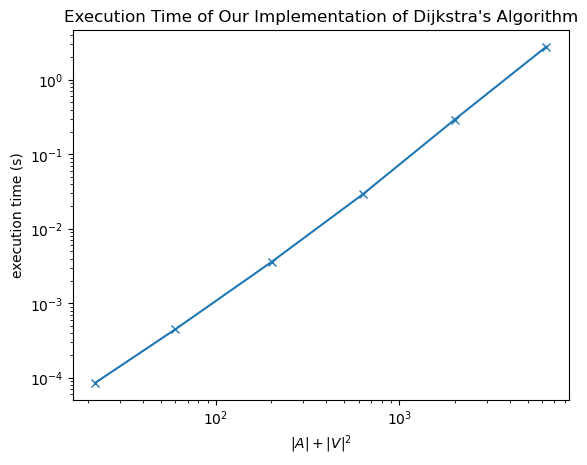

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot measured data
plt.plot(compl, times, 'x-')
plt.xscale('log') # logarithmic scale for x-axis
plt.yscale('log') # logarithmic scale for y-axis
plt.title('Execution Time of Our Implementation of Dijkstra\'s Algorithm')
plt.xlabel('$|A|+|V|^2$')
plt.ylabel('execution time (s)')
plt.show()
